![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [34]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [35]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [36]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [37]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [38]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


La estación del año con días con menos usuarios de bicicletas por hora es en invierno, y la estación con mayor número de usuarios por hora es verano.
La hora con un mayor número de usuarios en promedio son las 5 pm, y la hora con menos usuarios en promedio son las 4 am. 
La mediana de usuarios por hora es 145 usuarios de los cuales 118 son ususarios registrados y 17 usuarios casuales.
La mediana de la temperatura registrada es de 20.5 °C, con un mínimo de 0.82 °C y u máximo de 41 °C.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

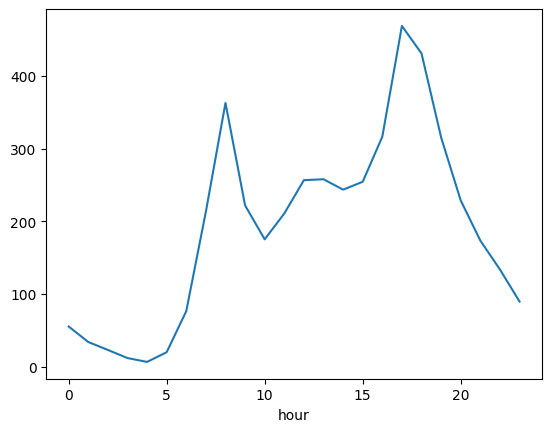

In [39]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

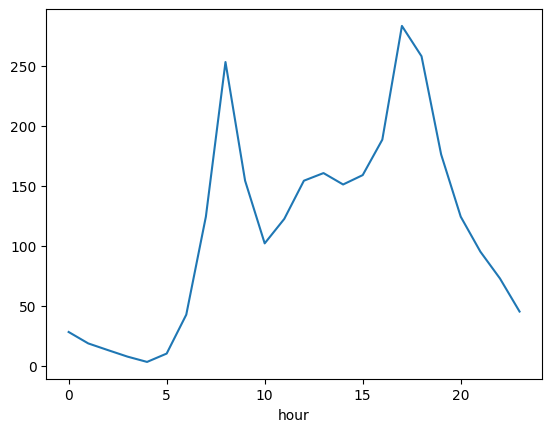

In [40]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season==1].groupby('hour').total.mean().plot()

Hay menos usuarios a lo largo del día durante el invierno que los promedios anuales.

<Axes: xlabel='hour'>

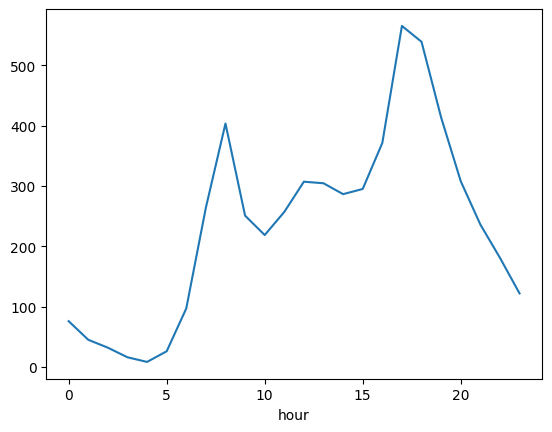

In [41]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season==3].groupby('hour').total.mean().plot()

Hay más ususarios durante todos los horarios durante el verano, comparado con los promedios anuales.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [42]:
# Celda 3
bikes2=bikes[['season','hour']].copy()
dummies = pd.get_dummies(bikes2['season'])
step_1 = pd.concat([bikes2, dummies], axis=1)      
step_1.drop(['season'], inplace=True, axis=1)
XTotal = step_1.values
Y_df=bikes[['total']].copy()
yTotal = Y_df.values
reg = LinearRegression()
reg.fit(XTotal, yTotal)
print('Coefficients: ', reg.coef_)

Coefficients:  [[ 10.54520609 -75.96697493  24.35025698  43.50057501   8.11614294]]


In [43]:
step_1

,hour,1,2,3,4
datetime,,,,,
2011-01-01 00:00:00,0,1,0,0,0
2011-01-01 01:00:00,1,1,0,0,0
2011-01-01 02:00:00,2,1,0,0,0
2011-01-01 03:00:00,3,1,0,0,0
2011-01-01 04:00:00,4,1,0,0,0
...,...,...,...,...,...
2012-12-19 19:00:00,19,0,0,0,1
2012-12-19 20:00:00,20,0,0,0,1
2012-12-19 21:00:00,21,0,0,0,1


In [44]:
print('Variance score: {}'.format(reg.score(XTotal, yTotal)))

Variance score: 0.22339339904452493


La variable hora tine un coeficiente de 10.54, lo que indica que a mayor horas transcurridas en el día el número de usuarios incrementa.
Seguido tenemos a invierno, cuyo coeficiente negativo de -75.96 nos indica que hay una reducción de usuarios durante esta temporada.
Con la mayor impacto positivo tenemos la variable verano con 43.5, indicando que esta estación del año afecta positivamente en mayor grado el número de usuarios.

Limitaciones:

-El score de regresión es muy bajo 0.223, por lo que la variabilidad de 'total' solo es explicada en 22.3% al utilizar las variables hora, y las estaciones del año (dicotómicas) como variables predictoras lineales

-Tendremos resultados negativos que no tienen sentido prácitco, un ejemplo 0 horas en invierno, nos resultaría en -75.96 usuarios.


### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [45]:
y = (bikes.total > 145).astype(int)

In [46]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001


In [47]:
# Impresión variable a usar (Hits)
j = 0
print(bikes2.columns[j])

season


In [48]:
# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(bikes2.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

array([1., 2., 3., 4.])

In [49]:
# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=3
filter_l = bikes2.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [50]:
# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

In [51]:
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

0.49966819704322485

In [52]:
# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

0.4975341001097561

In [53]:
# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

In [54]:
# Ganancia de la variable 'Hits' en el punto de corte selecionado
gini_impurity(bikes2.iloc[:, j], y, splits[k])

0.000866410665477213

In [55]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

In [56]:
# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(bikes2, y,10)
j, split, gain

(1, 8.0, 0.16178755449047394)

In [57]:
# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = bikes2.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

In [58]:
y.shape[0], y_l.shape[0], y_r.shape[0]

(10886, 3594, 7292)

In [59]:
y.mean(), y_l.mean(), y_r.mean()

(0.49917325004593055, 0.09404563160823595, 0.6988480526604498)

In [60]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

In [61]:
# Aplicación de la función tree_grow
tree_grow(bikes2, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 0.06425451863089747},
 'sr': {'y_pred': 1,
  'y_prob': 0.6987935289278859,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 0.05853892375774267}}

In [62]:
tree = tree_grow(bikes2, y, level=0, min_gain=0.001, max_depth=4, num_pct=10)
tree

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': [1, 7.0],
  'n_samples': 3594,
  'gain': 0.06425451863089747,
  'sl': {'y_pred': 0,
   'y_prob': 0.026106335561922954,
   'level': 2,
   'split': [1, 6.0],
   'n_samples': 3139,
   'gain': 0.0027878761479700337,
   'sl': {'y_pred': 0,
    'y_prob': 0.010796723752792257,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 0.0008089140964271449},
   'sr': {'y_pred': 0,
    'y_prob': 0.11816192560175055,
    'level': 3,
    'split': [0, 3.0],
    'n_samples': 455,
    'gain': 0.009214309359181827,
    'sl': {'y_pred': 0,
     'y_prob': 0.05240174672489083,
     'level': 4,
     'split': -1,
     'n_samples': 227,
     'gain': 0.004655188204359839},
    'sr': {'y_pred': 0,
     'y_prob': 0.18695652173913044,
     'level': 4,
     'split': -1,
     'n_samples': 228,
     'g

In [63]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted


In [64]:
# Ejecución de función tree_predict
y_pred=tree_predict(bikes2, tree)

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

In [67]:
# Cálculo de accuracy de las predicciones del árbol
print((tp+tn)/(tn+fn+fp+tp))

0.8353848980341724


Se utilizó como variable binaria dependiente si es que el número de usuario es mayor a la mediana global (145 usuarios) esta toma el valor de 1, si no 0. Se requirió una profundidad de 4 para que este árbol de decisión tuviese 6 nodos finales:

1- Split (estación, verano)

2 - Split(estación, primavera)

3- Split (hora, 16 horas)

4- Split (hora, 22 horas)

5- Split (hora, 13 horas)

6 - Split (hora, 23 horas)

El accuracy de las predicciones de entrenamiento (fue todo el dataset, no realicé partición) es de 0.8353


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
Xnew=bikes2.values

In [70]:
XTrain, XTest, yTrain, yTest = train_test_split(Xnew, y, test_size=0.33, random_state=0)

In [71]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 12)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, XTrain, yTrain, cv=10, scoring='accuracy').mean())

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

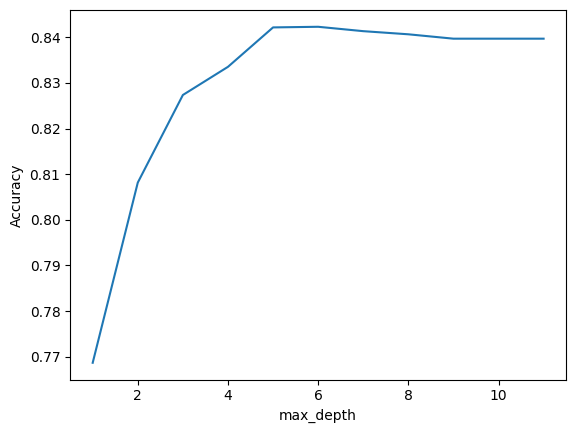

In [73]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [74]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.8423122310539863, 6)

In [75]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=6, random_state=0)
clf.fit(XTrain, yTrain)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [76]:
from sklearn.tree import plot_tree

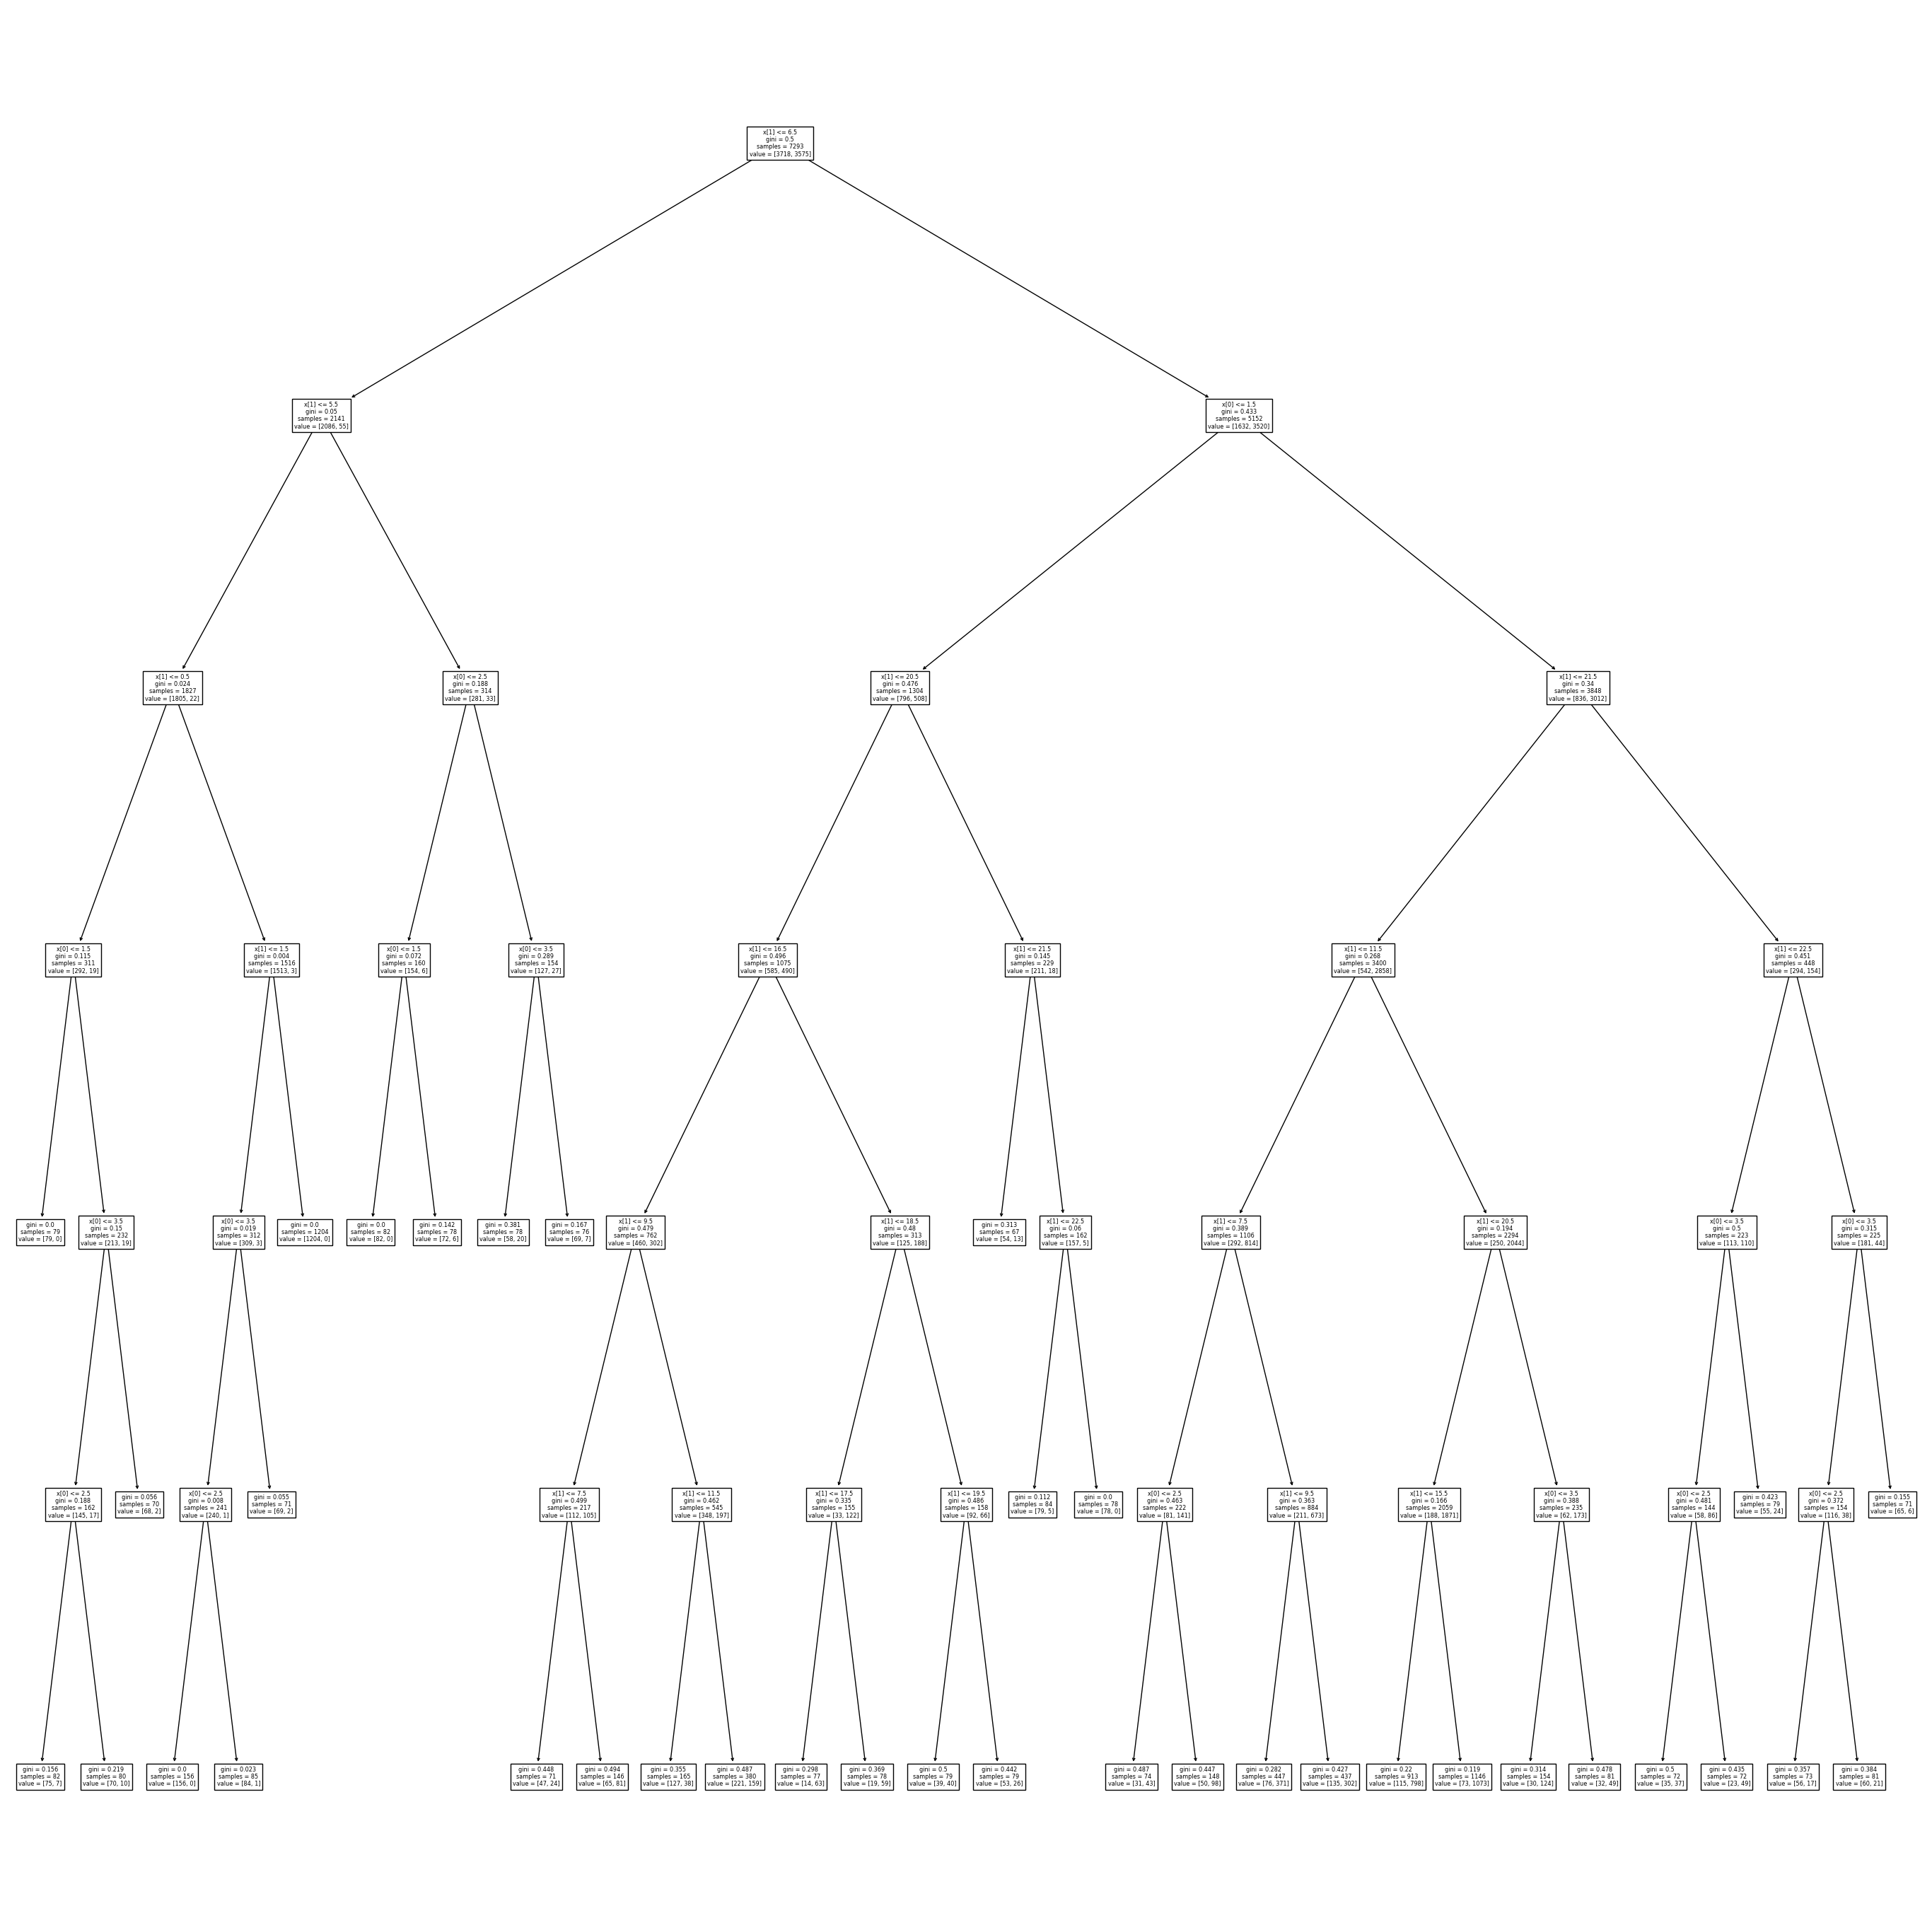

In [77]:
plt.figure(figsize=(35,35))
plot_tree(clf)
plt.show()

In [78]:
#Cálculo de accuracy utilizando la partición de prueba
cross_val_score(clf, XTest, yTest, cv=10, scoring='accuracy').mean()

0.8427537913958526

Al evaluar la diferentes profundidades en el árbol es posible identificar el valor de 6 como óptimo.

Encontramos un accuracy superior (0.8427 vs 0.8353) al del árbol con profundidad 4 que hicimos manualmente.


Para este árbol evaluamos el accuracy en la partición de prueba (30% del dataset)

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [3]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [4]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [5]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [6]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 25)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

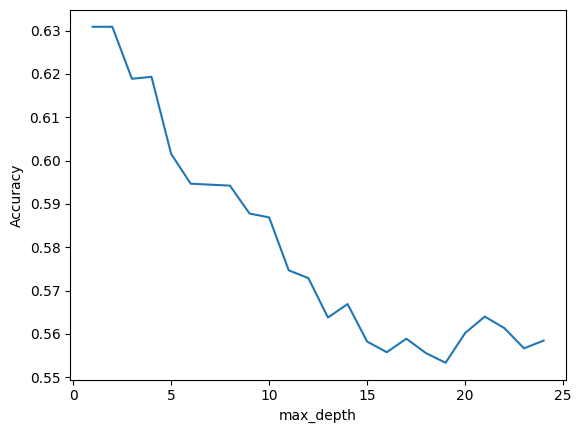

In [9]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [10]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [11]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf2 = DecisionTreeClassifier(max_depth=2, random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [12]:
#Cálculo de accuracy utilizando la partición de prueba
cross_val_score(clf2, X_test, y_test, cv=10, scoring='accuracy').mean()

0.6466666666666667

In [13]:
#Cálculo de accuracy utilizando la partición de prueba
cross_val_score(clf2, X_test, y_test, cv=10, scoring='f1').mean()

0.6614362993813206

In [14]:
# Regresión logística
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
print ("Accuracy : ", cross_val_score(classifier, X_test, y_test, cv=10, scoring='accuracy').mean())
print ("F1-score : ", cross_val_score(classifier, X_test, y_test, cv=10, scoring='f1').mean())


Accuracy :  0.6186666666666666
F1-score :  0.6176993905489887


Se creo un árbol de decisión con un parámetro de profundidad de 2, se utilizaron todas las variables en el dataset como predictoras a excepción de URL, como resultado se obtuvieron los siguientes scores:

-Accuracy árbol: 0.64666

-F1-score árbol: 0.66143

Se calibró independientemente un modelo de regresión logística, se utilizaron todas las variables en el dataset como predictoras a exepción de URL, como resultado se obtuvieron los siguientes scores:


-Accuracy RL: 0.61866

-F1-score RL: 0.61769


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [15]:
# Celda 7
# max_depth=5
from sklearn.ensemble import BaggingClassifier,VotingClassifier
clfBag = BaggingClassifier(DecisionTreeClassifier(max_depth=5),n_estimators=100, random_state=0)
clfBag.fit(X_train, y_train)

print ("Accuracy : ", cross_val_score(clfBag, X_test, y_test, cv=10, scoring='accuracy').mean())
print ("F1-score : ", cross_val_score(clfBag, X_test, y_test, cv=10, scoring='f1').mean())
Accuracy1=cross_val_score(clfBag, X_test, y_test, cv=10, scoring='accuracy').mean()
f1score1=cross_val_score(clfBag, X_test, y_test, cv=10, scoring='f1').mean()

Accuracy :  0.6506666666666667
F1-score :  0.667482758508559


In [16]:
# min_samples_leaf=10
clfBag2 = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=10),n_estimators=100, random_state=0)
clfBag2.fit(X_train, y_train)

print ("Accuracy : ", cross_val_score(clfBag2, X_test, y_test, cv=10, scoring='accuracy').mean())
print ("F1-score : ", cross_val_score(clfBag2, X_test, y_test, cv=10, scoring='f1').mean())
Accuracy2=cross_val_score(clfBag2, X_test, y_test, cv=10, scoring='accuracy').mean()
f1score2=cross_val_score(clfBag2, X_test, y_test, cv=10, scoring='f1').mean()

Accuracy :  0.6606666666666667
F1-score :  0.6759489252080018


In [17]:
# Logistic regression
clfBag3 = BaggingClassifier(LogisticRegression(),n_estimators=100, random_state=0)
clfBag3.fit(X_train, y_train)

print ("Accuracy : ", cross_val_score(clfBag3, X_test, y_test, cv=10, scoring='accuracy').mean())
print ("F1-score : ", cross_val_score(clfBag3, X_test, y_test, cv=10, scoring='f1').mean())
Accuracy3=cross_val_score(clfBag3, X_test, y_test, cv=10, scoring='accuracy').mean()
f1score3=cross_val_score(clfBag3, X_test, y_test, cv=10, scoring='f1').mean()

Accuracy :  0.6226666666666667
F1-score :  0.6217057714570903


In [20]:
#Votación Mayoritaria
accuracysum=Accuracy1+Accuracy2+Accuracy3
eclf1 = VotingClassifier(estimators=[('lr', clfBag3), ('dt1', clfBag), ('dt2', clfBag2)], voting='hard')
eclf1.fit(X_train, y_train)
print ("Accuracy : ", cross_val_score(eclf1, X_test, y_test, cv=10, scoring='accuracy').mean())
print ("F1-score : ", cross_val_score(eclf1, X_test, y_test, cv=10, scoring='f1').mean())


Accuracy :  0.654
F1-score :  0.6687805093111008


Evaluando los modelos de clasificación indepentientemente, el mejor resultado fue el obtenido por el decision tree donde el min_samples_leaf=10, con un accuracy de 0.6606 y un F1-score de 0.67594, el peor fue la regresión logística con un accuracy de 0.6226 y un F1-score de 0.6217.

Usando el método de votación mayoritaria los resultados fueron los siguientes un Accuracy de 0.654 y un F1-score de 0.66878, ligeramente menor al obtenido en el decision tree donde el min_samples_leaf=10.


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [25]:
# Celda 8
#Votación Ponderada
eclf2 = VotingClassifier(estimators=[('lr', clfBag3), ('dt1', clfBag), ('dt2', clfBag2)], voting='soft',weights=[Accuracy3/accuracysum,Accuracy1/accuracysum,Accuracy2/accuracysum])
eclf2.fit(X_train, y_train)
print ("Accuracy : ", cross_val_score(eclf2, X_test, y_test, cv=10, scoring='accuracy').mean())
print ("F1-score : ", cross_val_score(eclf2, X_test, y_test, cv=10, scoring='f1').mean())


Accuracy :  0.6559999999999999
F1-score :  0.67520528123857


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [26]:
# Celda 9
accuracy7 = cross_val_score(eclf1, X_test, y_test, cv=10, scoring='accuracy').mean()
accuracy8 = cross_val_score(eclf2, X_test, y_test, cv=10, scoring='accuracy').mean()
f1score7 = cross_val_score(eclf1, X_test, y_test, cv=10, scoring='f1').mean()
f1score8 = cross_val_score(eclf2, X_test, y_test, cv=10, scoring='f1').mean()


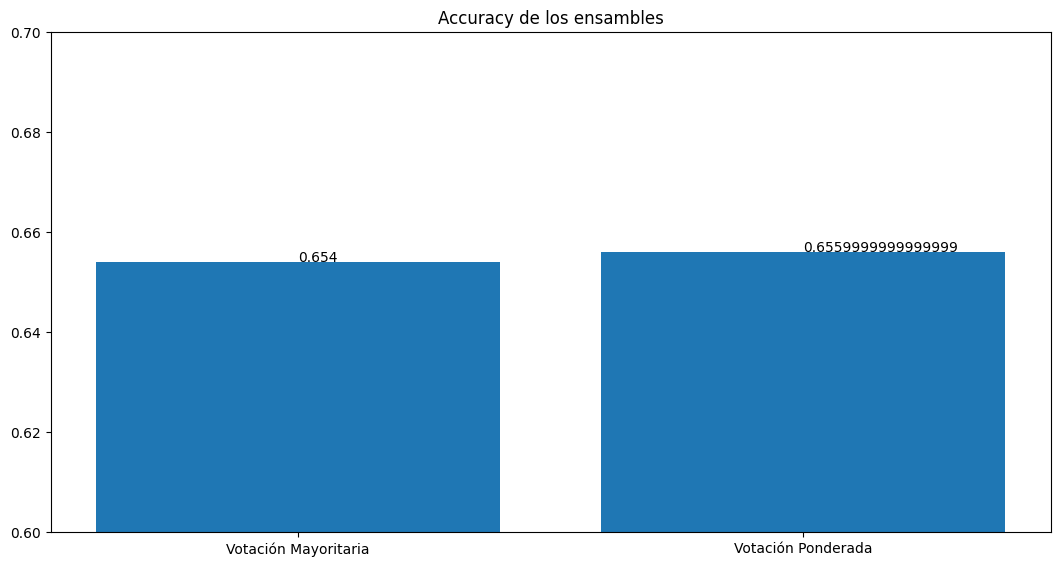

In [27]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
plt.ylim(0.6, 0.7)
ax.set_title("Accuracy de los ensambles")
ejeX = ['Votación Mayoritaria','Votación Ponderada']
ejeY = [accuracy7,accuracy8]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

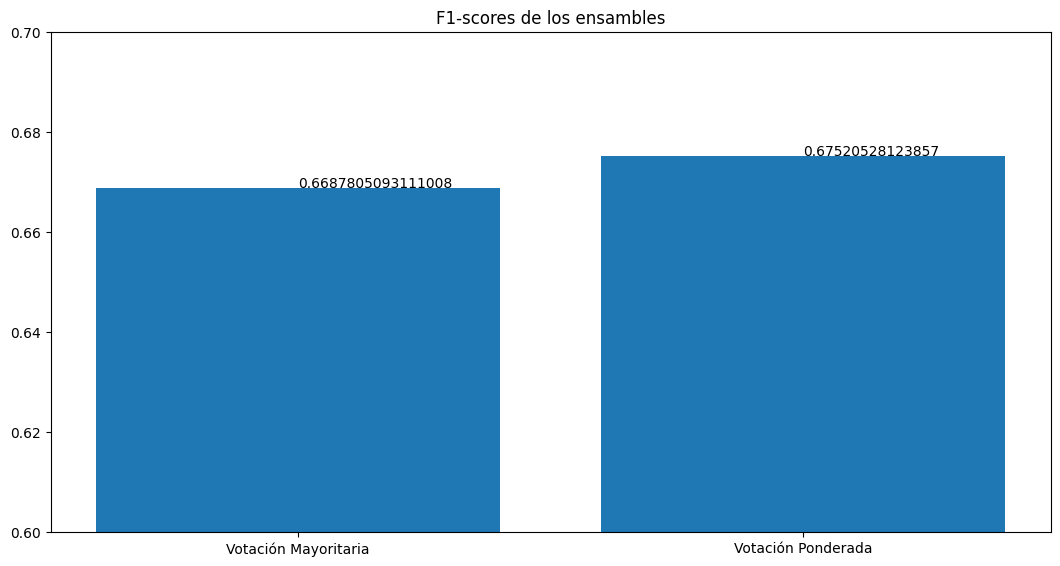

In [28]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
plt.ylim(0.6, 0.7)
ax.set_title("F1-scores de los ensambles")
ejeX = ['Votación Mayoritaria','Votación Ponderada']
ejeY = [f1score7,f1score8]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

La metodología de votación ponderada combinada con un modo de voting 'soft' nos produce un accuracy y un f1-score mayor al obtenido utilizando votación mayoritaria (hard). 

Ventajas de la votación ponderada

1.   Puede resaltar algunos de los mejores estimadores base.
2.   Permite asignar un peso a cada modelo parte de la votación, basado en el performance de un score seleccionado.



